In [1]:
from jaxtyping import install_import_hook
import numpy as np

# with install_import_hook("prediction", ("beartype", "beartype")):
import prediction

ds = prediction.Dataset.from_npz("data.npz")

In [2]:
from functools import partial

model = partial(
    prediction.models.embedding,
    ds, X_p=True, X_m=True, alpha=0.001, layers=[64, 64], shape=ds.data.shape, dim=4, scale=0.01)

trainer = prediction.CrossValidationTrainer(ds, model, batch=128, replicates=3, k=5, do_baseline=True)

In [3]:
res = trainer.train_replicates(epoch_size=100, epochs=100)

100%|██████████| 25/25 [00:24<00:00,  1.02it/s]


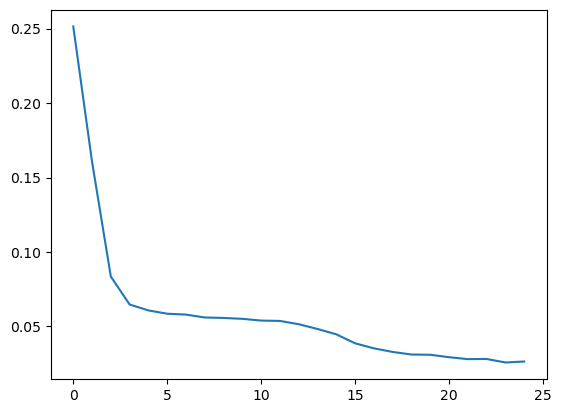

In [5]:
from matplotlib import pyplot as plt
plt.plot(res["val_loss"][0, :, 0])

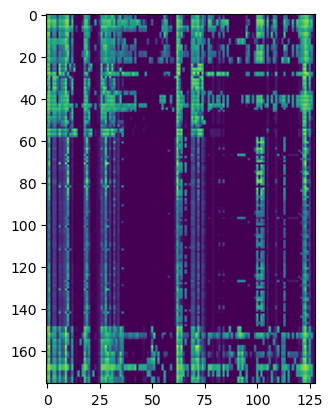

In [2]:

import numpy as np

from